In [1]:
from experiment import Experiment
import torch
%matplotlib inline

In [2]:
var_dict = dict(
    numerical_vars = ['Length', 'Diameter', 'Height' ,'Whole_weight', 
                      'Shucked_weight', 'Viscera_weight', 'Shell_weight'],
    categorical_vars = ['Sex'],
    class_var = 'class'
)

In [17]:
exp = Experiment('data/abalone.csv', 
                 var_dict,
                 embedding_dim=4,
                 lr=1e-3,
                 weight_decay=0.0,
                 batch_size=1024,
                 n_epoch=100,
                 verbose=False,
                 n_bins_range=range(2, 21),
                 n_init_bins_list=[10,15,20])

In [18]:
exp.data.shape

(4177, 9)

In [19]:
%time clustering_scores = exp.test_clustering_performance()

#Init Bin = 10
Learned #Bin by Variables = [2, 3, 2, 4, 2, 3, 2]
#Init Bin = 15
Learned #Bin by Variables = [3, 3, 2, 4, 3, 2, 4]
#Init Bin = 20
Learned #Bin by Variables = [3, 3, 3, 4, 3, 2, 4]
CPU times: user 3min 36s, sys: 3min 37s, total: 7min 13s
Wall time: 3min 11s


In [20]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

kmeans, #Cols = 10, NMI = 0.1607
agglomerative, #Cols = 10, NMI = 0.1591


In [21]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

kmeans, #Cols = 10, NMI = 0.1752
agglomerative, #Cols = 10, NMI = 0.1678


In [22]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

kmeans
#Bins = 2, #Cols = 17, #NMI = 0.1611
#Bins = 3, #Cols = 24, #NMI = 0.1609
#Bins = 4, #Cols = 31, #NMI = 0.1750
#Bins = 5, #Cols = 38, #NMI = 0.1665
#Bins = 6, #Cols = 45, #NMI = 0.1572
#Bins = 7, #Cols = 52, #NMI = 0.1677
#Bins = 8, #Cols = 59, #NMI = 0.1630
#Bins = 9, #Cols = 66, #NMI = 0.1700
#Bins = 10, #Cols = 73, #NMI = 0.1660
#Bins = 11, #Cols = 80, #NMI = 0.1653
#Bins = 12, #Cols = 87, #NMI = 0.1683
#Bins = 13, #Cols = 94, #NMI = 0.1673
#Bins = 14, #Cols = 101, #NMI = 0.1620
#Bins = 15, #Cols = 108, #NMI = 0.1637
#Bins = 16, #Cols = 115, #NMI = 0.1548
#Bins = 17, #Cols = 122, #NMI = 0.1703
#Bins = 18, #Cols = 129, #NMI = 0.1672
#Bins = 19, #Cols = 136, #NMI = 0.1603
#Bins = 20, #Cols = 143, #NMI = 0.1582
agglomerative
#Bins = 2, #Cols = 17, #NMI = 0.1612
#Bins = 3, #Cols = 24, #NMI = 0.1634
#Bins = 4, #Cols = 31, #NMI = 0.1731
#Bins = 5, #Cols = 38, #NMI = 0.1688
#Bins = 6, #Cols = 45, #NMI = 0.1718
#Bins = 7, #Cols = 52, #NMI = 0.1712
#Bins = 8, #Cols = 59, #NMI = 0.1628

In [23]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

kmeans
#Bins = 2, #Cols = 17, #NMI = 0.1469
#Bins = 3, #Cols = 24, #NMI = 0.1553
#Bins = 4, #Cols = 31, #NMI = 0.1558
#Bins = 5, #Cols = 38, #NMI = 0.1590
#Bins = 6, #Cols = 45, #NMI = 0.1566
#Bins = 7, #Cols = 52, #NMI = 0.1634
#Bins = 8, #Cols = 59, #NMI = 0.1631
#Bins = 9, #Cols = 66, #NMI = 0.1544
#Bins = 10, #Cols = 73, #NMI = 0.1542
#Bins = 11, #Cols = 80, #NMI = 0.1529
#Bins = 12, #Cols = 87, #NMI = 0.1534
#Bins = 13, #Cols = 94, #NMI = 0.1580
#Bins = 14, #Cols = 101, #NMI = 0.1545
#Bins = 15, #Cols = 108, #NMI = 0.1573
#Bins = 16, #Cols = 115, #NMI = 0.1559
#Bins = 17, #Cols = 122, #NMI = 0.1505
#Bins = 18, #Cols = 128, #NMI = 0.1537
#Bins = 19, #Cols = 136, #NMI = 0.1506
#Bins = 20, #Cols = 142, #NMI = 0.1533
agglomerative
#Bins = 2, #Cols = 17, #NMI = 0.1469
#Bins = 3, #Cols = 24, #NMI = 0.1579
#Bins = 4, #Cols = 31, #NMI = 0.1568
#Bins = 5, #Cols = 38, #NMI = 0.1621
#Bins = 6, #Cols = 45, #NMI = 0.1615
#Bins = 7, #Cols = 52, #NMI = 0.1710
#Bins = 8, #Cols = 59, #NMI = 0.1572

In [24]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

kmeans
#Init Bins = 10, #Cols = 21, NMI = 0.1544
#Init Bins = 15, #Cols = 24, NMI = 0.1745
#Init Bins = 20, #Cols = 25, NMI = 0.1644
agglomerative
#Init Bins = 10, #Cols = 21, NMI = 0.1544
#Init Bins = 15, #Cols = 24, NMI = 0.1778
#Init Bins = 20, #Cols = 25, NMI = 0.1610


In [25]:
%time clf_scores = exp.test_classification_performance(cv=3)

#Init Bin = 10
Learned #Bin by Variables = [2, 3, 2, 3, 2, 3, 2]
#Init Bin = 15
Learned #Bin by Variables = [2, 6, 2, 4, 3, 2, 4]
#Init Bin = 20
Learned #Bin by Variables = [2, 2, 2, 2, 4, 2, 2]
#Init Bin = 10
Learned #Bin by Variables = [2, 3, 3, 4, 2, 3, 2]
#Init Bin = 15
Learned #Bin by Variables = [3, 5, 3, 4, 3, 2, 4]
#Init Bin = 20
Learned #Bin by Variables = [2, 4, 3, 2, 2, 2, 2]
#Init Bin = 10
Learned #Bin by Variables = [3, 3, 3, 4, 2, 3, 2]
#Init Bin = 15
Learned #Bin by Variables = [3, 6, 2, 4, 4, 3, 6]
#Init Bin = 20
Learned #Bin by Variables = [3, 3, 4, 3, 4, 5, 4]
CPU times: user 4min 57s, sys: 2.58 s, total: 4min 59s
Wall time: 4min 59s


In [26]:
exp.print_classification_scores(clf_scores, method='dummy_only')

DT performance
#cols = 10.0, Accuracy = 0.243 (+/- 0.010)
LR performance
#cols = 10.0, Accuracy = 0.252 (+/- 0.014)


In [27]:
exp.print_classification_scores(clf_scores, method='scale_numeric')

DT performance
#cols = 10.0, Accuracy = 0.243 (+/- 0.011)
LR performance
#cols = 10.0, Accuracy = 0.258 (+/- 0.012)


In [28]:
exp.print_classification_scores(clf_scores, method='equal_width')

DT performance
#Bins = 2, #Avg Cols = 17.0, Accuracy = 0.235 (+/- 0.010)
#Bins = 3, #Avg Cols = 24.0, Accuracy = 0.230 (+/- 0.011)
#Bins = 4, #Avg Cols = 31.0, Accuracy = 0.241 (+/- 0.019)
#Bins = 5, #Avg Cols = 38.0, Accuracy = 0.242 (+/- 0.012)
#Bins = 6, #Avg Cols = 45.0, Accuracy = 0.254 (+/- 0.032)
#Bins = 7, #Avg Cols = 52.0, Accuracy = 0.256 (+/- 0.012)
#Bins = 8, #Avg Cols = 59.0, Accuracy = 0.256 (+/- 0.016)
#Bins = 9, #Avg Cols = 66.0, Accuracy = 0.240 (+/- 0.022)
#Bins = 10, #Avg Cols = 73.0, Accuracy = 0.258 (+/- 0.011)
#Bins = 11, #Avg Cols = 80.0, Accuracy = 0.249 (+/- 0.016)
#Bins = 12, #Avg Cols = 87.0, Accuracy = 0.252 (+/- 0.020)
#Bins = 13, #Avg Cols = 94.0, Accuracy = 0.251 (+/- 0.009)
#Bins = 14, #Avg Cols = 101.0, Accuracy = 0.248 (+/- 0.031)
#Bins = 15, #Avg Cols = 108.0, Accuracy = 0.240 (+/- 0.016)
#Bins = 16, #Avg Cols = 115.0, Accuracy = 0.238 (+/- 0.026)
#Bins = 17, #Avg Cols = 122.0, Accuracy = 0.256 (+/- 0.006)
#Bins = 18, #Avg Cols = 129.0, Accuracy = 0.2

In [29]:
exp.print_classification_scores(clf_scores, method='equal_freq')

DT performance
#Bins = 2, #Avg Cols = 17.0, Accuracy = 0.213 (+/- 0.007)
#Bins = 3, #Avg Cols = 24.0, Accuracy = 0.232 (+/- 0.020)
#Bins = 4, #Avg Cols = 31.0, Accuracy = 0.244 (+/- 0.013)
#Bins = 5, #Avg Cols = 38.0, Accuracy = 0.243 (+/- 0.011)
#Bins = 6, #Avg Cols = 45.0, Accuracy = 0.237 (+/- 0.013)
#Bins = 7, #Avg Cols = 52.0, Accuracy = 0.238 (+/- 0.012)
#Bins = 8, #Avg Cols = 59.0, Accuracy = 0.238 (+/- 0.014)
#Bins = 9, #Avg Cols = 66.0, Accuracy = 0.242 (+/- 0.022)
#Bins = 10, #Avg Cols = 73.0, Accuracy = 0.251 (+/- 0.027)
#Bins = 11, #Avg Cols = 80.0, Accuracy = 0.247 (+/- 0.031)
#Bins = 12, #Avg Cols = 87.0, Accuracy = 0.249 (+/- 0.017)
#Bins = 13, #Avg Cols = 94.0, Accuracy = 0.237 (+/- 0.017)
#Bins = 14, #Avg Cols = 101.0, Accuracy = 0.237 (+/- 0.024)
#Bins = 15, #Avg Cols = 108.0, Accuracy = 0.233 (+/- 0.010)
#Bins = 16, #Avg Cols = 115.0, Accuracy = 0.238 (+/- 0.030)
#Bins = 17, #Avg Cols = 122.0, Accuracy = 0.243 (+/- 0.033)
#Bins = 18, #Avg Cols = 128.66666666666666, A

In [30]:
exp.print_classification_scores(clf_scores, method='semantic_binning')

DT performance
#Init Bins = 10, #Avg Cols = 21.666666666666668, Accuracy = 0.240 (+/- 0.006)
#Init Bins = 15, #Avg Cols = 28.0, Accuracy = 0.255 (+/- 0.002)
#Init Bins = 20, #Avg Cols = 22.666666666666668, Accuracy = 0.234 (+/- 0.015)
LR performance
#Init Bins = 10, #Avg Cols = 21.666666666666668, Accuracy = 0.246 (+/- 0.016)
#Init Bins = 15, #Avg Cols = 28.0, Accuracy = 0.252 (+/- 0.009)
#Init Bins = 20, #Avg Cols = 22.666666666666668, Accuracy = 0.246 (+/- 0.011)
NB performance
#Init Bins = 10, #Avg Cols = 21.666666666666668, Accuracy = 0.224 (+/- 0.012)
#Init Bins = 15, #Avg Cols = 28.0, Accuracy = 0.230 (+/- 0.038)
#Init Bins = 20, #Avg Cols = 22.666666666666668, Accuracy = 0.206 (+/- 0.010)


In [9]:
from data_handler import DataHandler
handler = DataHandler(exp.data, exp.var_dict)
from semantic_binning import SemanticBinning
sb = SemanticBinning(handler.var_dict, embedding_dim=8, batch_size=1024, 
                     n_epoch=20, lr=1e-2, weight_decay=0.0, verbose=True)
sb.fit(exp.data, n_init_bins=10)

>>> Epoch = 1, Loss = 0.3112121522426605
>>> Epoch = 2, Loss = 0.2500475347042084
>>> Epoch = 3, Loss = 0.22607435286045074
>>> Epoch = 4, Loss = 0.22498075664043427
>>> Epoch = 5, Loss = 0.2202286273241043
>>> Epoch = 6, Loss = 0.2193966507911682
>>> Epoch = 7, Loss = 0.21476447582244873
>>> Epoch = 8, Loss = 0.20659029483795166
>>> Epoch = 9, Loss = 0.22294725477695465
>>> Epoch = 10, Loss = 0.2030581384897232
>>> Epoch = 11, Loss = 0.20934467017650604
>>> Epoch = 12, Loss = 0.2114706188440323
>>> Epoch = 13, Loss = 0.2125558704137802
>>> Epoch = 14, Loss = 0.2118518054485321
>>> Epoch = 15, Loss = 0.2131754606962204
>>> Epoch = 16, Loss = 0.21204395592212677
>>> Epoch = 17, Loss = 0.20597118139266968
>>> Epoch = 18, Loss = 0.2119975984096527
>>> Epoch = 19, Loss = 0.20839433372020721
>>> Epoch = 20, Loss = 0.20563362538814545


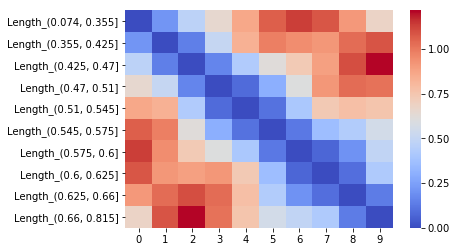

In [5]:
sb.plot_pairwise_distance_between_bins('Length')

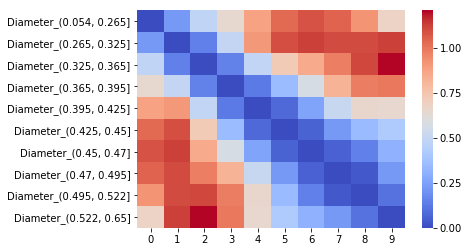

In [6]:
sb.plot_pairwise_distance_between_bins('Diameter')

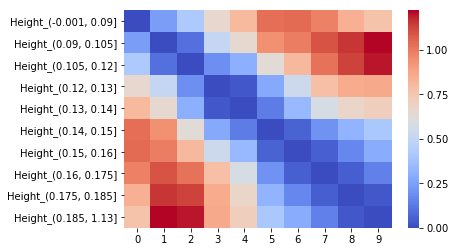

In [7]:
sb.plot_pairwise_distance_between_bins('Height')

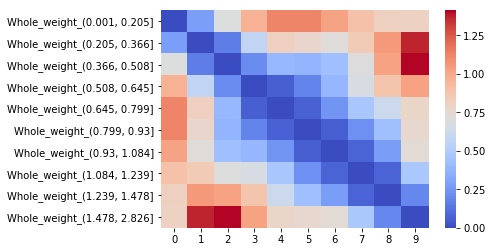

In [8]:
sb.plot_pairwise_distance_between_bins('Whole_weight')

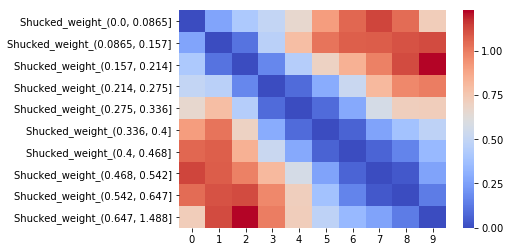

In [9]:
sb.plot_pairwise_distance_between_bins('Shucked_weight')

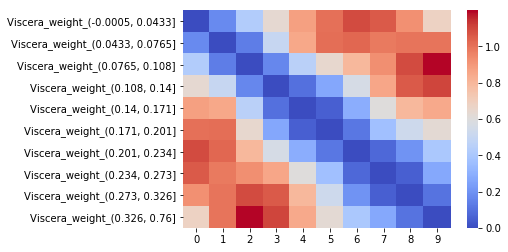

In [10]:
sb.plot_pairwise_distance_between_bins('Viscera_weight')

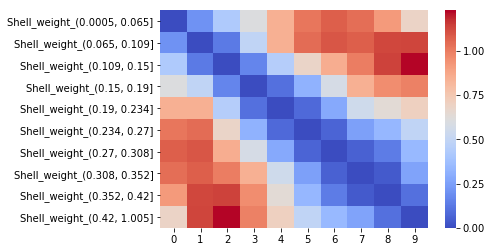

In [11]:
sb.plot_pairwise_distance_between_bins('Shell_weight')

In [6]:
for var, bins in sb.bins_by_var.items():
    print(var)
    print(bins['bins'])

Length
['(0.074, 0.47]', '(0.47, 0.815]']
Diameter
['(0.054, 0.265]', '(0.265, 0.425]', '(0.425, 0.65]']
Height
['(-0.001, 0.105]', '(0.105, 0.14]', '(0.14, 0.175]', '(0.175, 1.13]']
Whole_weight
['(0.001, 0.508]', '(0.508, 2.826]']
Shucked_weight
['(0.0, 0.336]', '(0.336, 1.488]']
Viscera_weight
['(-0.0005, 0.201]', '(0.201, 0.76]']
Shell_weight
['(0.0005, 0.15]', '(0.15, 0.27]', '(0.27, 1.005]']
